<a href="https://colab.research.google.com/github/vyreddy-code/YRVari-housing-affordability-project/blob/main/A10_Football_Club_Competiotion_Historical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Beyond the Pitch: Quantifying Success in Modern Football**
Team 10: Kush Vyas, Gurveen Rekhi, Shi Qiu, Yu-Chien Chen, Yashaswini Reddy, Xiaoxuan Zhu

# **Problem Definition**

This project analyzes what drives football club success by combining financial strength, squad composition, and disciplinary behavior into one season-level analytical framework. Using BigQuery and SQL on global match, player, and valuation data, it explores whether teams win more because they spend more, build smarter squads, or maintain better on-field discipline.

The study focuses on three pillars:

Financial Strength: How spending and squad market value relate to win rates and seasonal efficiency.

Squad Composition: How age profiles, positional balance, and player consistency shape tactical performance.

Discipline & Competition Context: How league intensity and card frequency impact match outcomes.

The project converts large-scale football data into insights on team strategy, player development, and the economics behind sustained success.

Finally, at a global level, it compares how player valuations have evolved across Europe, South America, and Asia examining regional CAGR, valuation spikes during major tournaments, shifts in the Europe-South America valuation gap, and how league competitiveness and international exposure influence long-term growth. This links club performance to broader trends in the worldwide football econom

# **Data Sources**

Football (Soccer) data scraped from Transfermarkt website https://www.kaggle.com/datasets/davidcariboo/player-scores
The total size of the entire dataset (Version 602) is 555.82 MB. There are 10 files in total, with 133 columns and over 100k+ across all files.

(Values missing in the dataset its partially cleaned and has many errors on downloading and working on)


# **Introduction & Motivation**

The modern football landscape has become increasingly complex, shaped by growing financial disparities, evolving tactical systems, and rising competitive pressures across leagues. Clubs now operate in an environment where transfer spending, squad-building strategies, and player discipline can significantly influence long-term performance, yet these relationships are often discussed anecdotally rather than evaluated through data. Our analysis addresses this gap by building a unified club-by-season dataset from raw match, valuation, and appearance records, enabling a rigorous examination of how financial strength, squad composition, and on-field discipline jointly impact competitive outcomes. Readers should care about this work because it provides evidence-based insights that can help clubs optimize recruitment, allocate financial resources more effectively, and understand which factors truly differentiate high-performing teams from the rest. By translating large-scale football data into clear, actionable findings, this project offers meaningful strategic value for analysts, club executives, and decision-makers who seek to improve performance in an increasingly data-driven sport.

# **Entity Relationship Diagram**

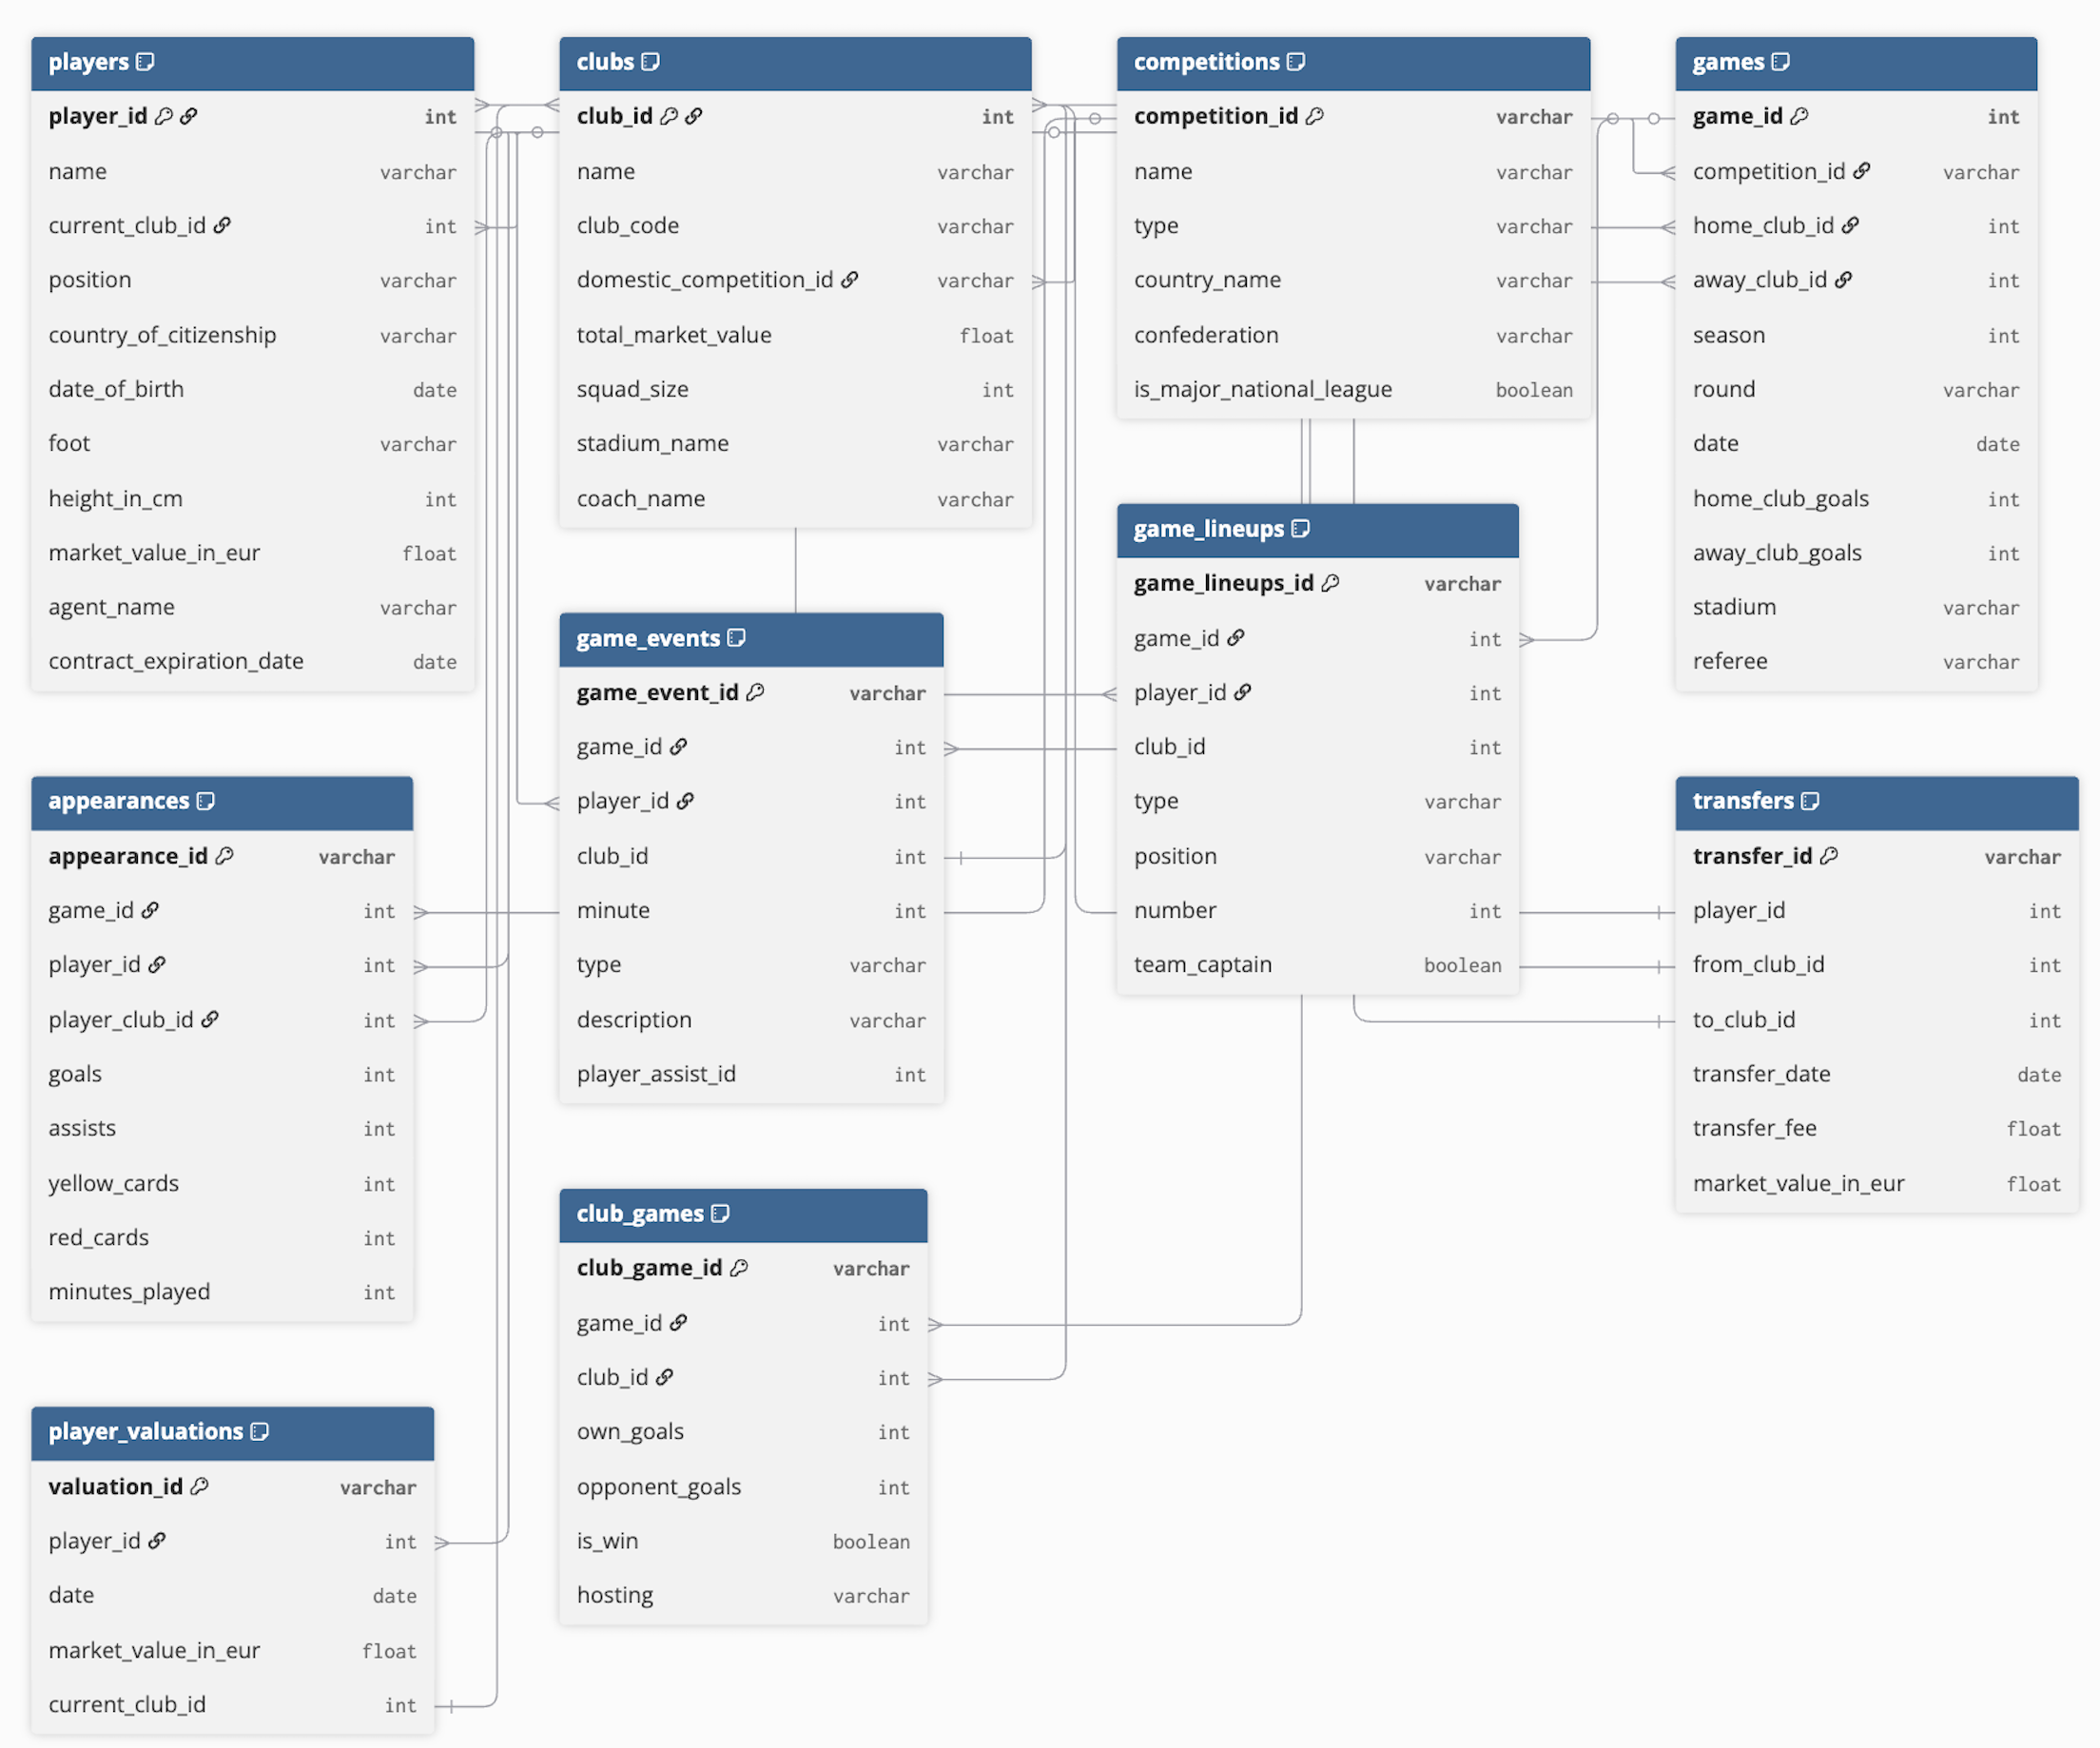

#**Tableau Public Link**


For our first dashboard, we are showing some of our intial observations that were in EDA process. The second one is showing the differences in position on how they are paid and their performance.
https://public.tableau.com/app/profile/gurveen.rekhi/viz/A10Assignment2/Story1?publish=yes

**Screenshots**

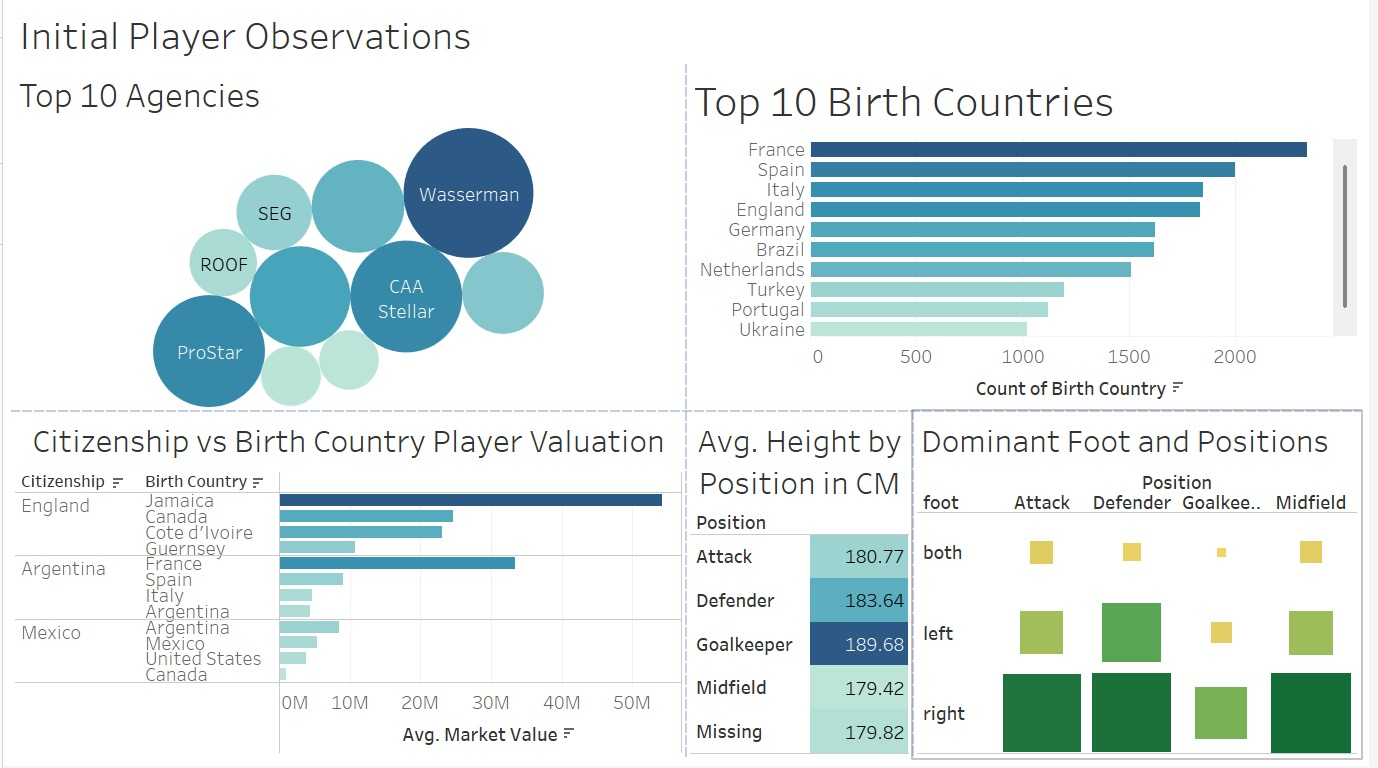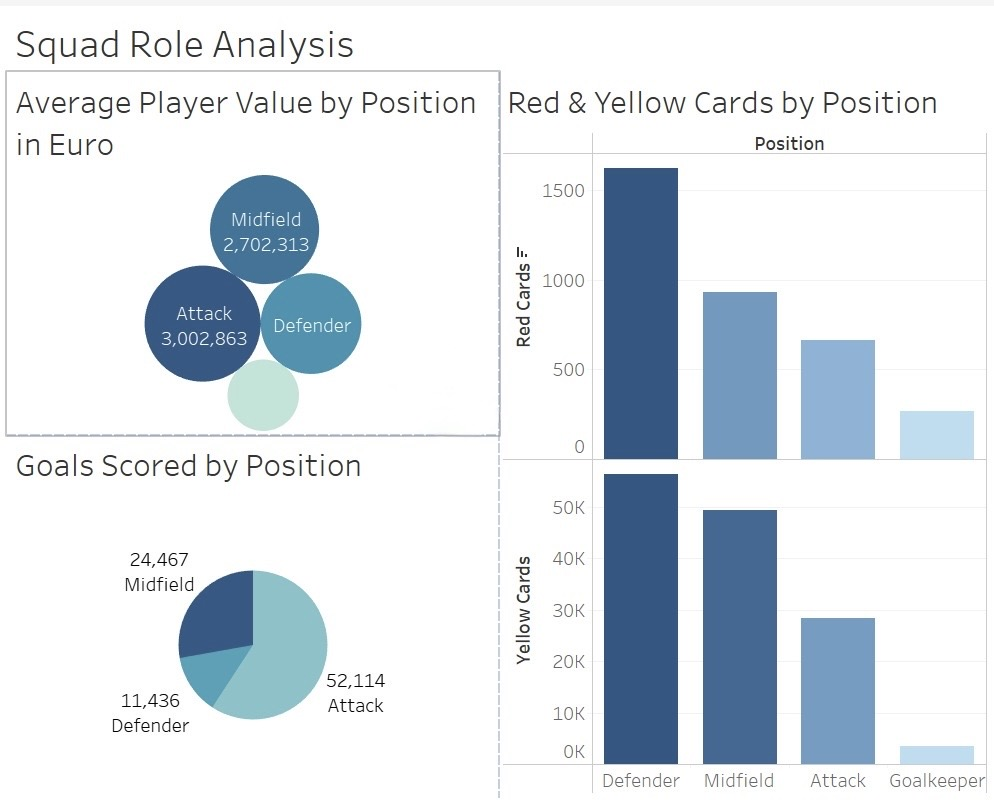

# **Executive Summary**


This project investigates the key drivers of football club success by analyzing how financial strength, squad composition, and disciplinary behavior shape
seasonal performance across global competitions. Using historical datasets containing match results, player appearances, valuations, and event-level actions, we constructed a unified club-by-season dataset that allowed us to examine performance patterns in a consistent and comparable way. Through extensive SQL-based data cleaning, integration, and exploratory analysis in BigQuery, we explored how club spending and squad market value correlate with win rates, how player age profiles and positional balance contribute to tactical effectiveness, and how variations in discipline and competition intensity influence match outcomes. The study highlights how football has evolved economically and strategically over time, revealing insights that can help clubs refine recruitment strategies, optimize squad structure, and make more informed financial and tactical decisions.

#Authenticate & Initialize BigQuery

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import bigquery
client = bigquery.Client(project="ba775-fall25-a10")

# **Data Cleaning**


Null Check Before Cleaning - `games` table

In [ ]:
%%bigquery --project ba775-fall25-a10
SELECT
  COUNT(*) AS total_rows,
  SUM(CASE WHEN game_id IS NULL THEN 1 ELSE 0 END) AS null_game_id,
  SUM(CASE WHEN competition_id IS NULL THEN 1 ELSE 0 END) AS null_competition_id,
  SUM(CASE WHEN season IS NULL THEN 1 ELSE 0 END) AS null_season,
  SUM(CASE WHEN date IS NULL THEN 1 ELSE 0 END) AS null_date,
  SUM(CASE WHEN home_club_id IS NULL THEN 1 ELSE 0 END) AS null_home_club_id,
  SUM(CASE WHEN away_club_id IS NULL THEN 1 ELSE 0 END) AS null_away_club_id,
  SUM(CASE WHEN home_club_goals IS NULL THEN 1 ELSE 0 END) AS null_home_club_goals,
  SUM(CASE WHEN away_club_goals IS NULL THEN 1 ELSE 0 END) AS null_away_club_goals,
  SUM(CASE WHEN home_club_position IS NULL THEN 1 ELSE 0 END) AS null_home_club_position,
  SUM(CASE WHEN away_club_position IS NULL THEN 1 ELSE 0 END) AS null_away_club_position,
  SUM(CASE WHEN attendance IS NULL THEN 1 ELSE 0 END) AS null_attendance,
  SUM(CASE WHEN referee IS NULL THEN 1 ELSE 0 END) AS null_referee,
  SUM(CASE WHEN url IS NULL THEN 1 ELSE 0 END) AS null_url,
  SUM(CASE WHEN home_club_formation IS NULL THEN 1 ELSE 0 END) AS null_home_club_formation,
  SUM(CASE WHEN away_club_formation IS NULL THEN 1 ELSE 0 END) AS null_away_club_formation,
  SUM(CASE WHEN home_club_name IS NULL THEN 1 ELSE 0 END) AS null_home_club_name,
  SUM(CASE WHEN away_club_name IS NULL THEN 1 ELSE 0 END) AS null_away_club_name,
  SUM(CASE WHEN competition_type IS NULL THEN 1 ELSE 0 END) AS null_competition_type

FROM `ba775-fall25-a10.ba775fall25a10.games`;

Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,null_game_id,null_competition_id,null_season,null_date,null_home_club_id,null_away_club_id,null_home_club_goals,null_away_club_goals,null_home_club_position,null_away_club_position,null_attendance,null_referee,null_url,null_home_club_formation,null_away_club_formation,null_home_club_name,null_away_club_name,null_competition_type
0,74026,0,0,0,0,9,9,12,12,22467,22467,9948,652,0,6975,6806,12850,11455,0


1. Columns were dropped with high missingness or no relevance to our analysis:
*   `home_club_position` and `away_club_position` contain substantial missingness and represent match-day rankings rather than season-end outcomes, which do not align with our analysis objectives.
*   `home_club_name` and `away_club_name` contain over 10,000 missing values, and the official club name can be reliably retrieved from the clubs table using club_id, we removed name columns to avoid redundancy.
*   `attendance`, `home_club_formation`, and `away_club_formation` had high missing rates and are not used in any subsequent analytical steps.
*  `referee`,`url` were removed because they provide metadata that does not contribute to understanding club performance or valuation.



2. Rows missing critical match identifiers, such as `club ID` and `club goals` were removed because they prevent calculating match outcomes.


In [ ]:
%%bigquery --project ba775-fall25-a10
CREATE OR REPLACE TABLE `ba775-fall25-a10.ba775fall25a10.games_cleaned_final` AS
SELECT
  game_id,
  competition_id,
  season,
  round,
  date,
  home_club_id,
  away_club_id,
  home_club_goals,
  away_club_goals,
  home_club_manager_name,
  away_club_manager_name,
  competition_type
FROM `ba775-fall25-a10.ba775fall25a10.games`
WHERE
  game_id IS NOT NULL
  AND competition_id IS NOT NULL
  AND season IS NOT NULL
  AND date IS NOT NULL
  AND home_club_id IS NOT NULL
  AND away_club_id IS NOT NULL
  AND home_club_goals IS NOT NULL
  AND away_club_goals IS NOT NULL;


Query is running:   0%|          |

""


Final Check After Cleaning - `games_cleaned_final` table

In [ ]:
%%bigquery --project ba775-fall25-a10
SELECT
  COUNT(*) AS total_rows,
  SUM(CASE WHEN game_id IS NULL THEN 1 ELSE 0 END) AS null_game_id,
  SUM(CASE WHEN competition_id IS NULL THEN 1 ELSE 0 END) AS null_competition_id,
  SUM(CASE WHEN season IS NULL THEN 1 ELSE 0 END) AS null_season,
  SUM(CASE WHEN round IS NULL THEN 1 ELSE 0 END) AS null_round,
  SUM(CASE WHEN date IS NULL THEN 1 ELSE 0 END) AS null_date,
  SUM(CASE WHEN home_club_id IS NULL THEN 1 ELSE 0 END) AS null_home_club_id,
  SUM(CASE WHEN away_club_id IS NULL THEN 1 ELSE 0 END) AS null_away_club_id,
  SUM(CASE WHEN home_club_goals IS NULL THEN 1 ELSE 0 END) AS null_home_club_goals,
  SUM(CASE WHEN away_club_goals IS NULL THEN 1 ELSE 0 END) AS null_away_club_goals,
  SUM(CASE WHEN competition_type IS NULL THEN 1 ELSE 0 END) AS null_competition_type
FROM `ba775-fall25-a10.ba775fall25a10.games_cleaned_final`;


Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,null_game_id,null_competition_id,null_season,null_round,null_date,null_home_club_id,null_away_club_id,null_home_club_goals,null_away_club_goals,null_competition_type
0,74014,0,0,0,0,0,0,0,0,0,0


Null Check Before Cleaning - `clubs` table

In [ ]:
%%bigquery --project ba775-fall25-a10
SELECT
  COUNT(*) AS total_rows,
  SUM(CASE WHEN club_id IS NULL THEN 1 ELSE 0 END) AS null_club_id,
  SUM(CASE WHEN club_code IS NULL THEN 1 ELSE 0 END) AS null_club_code,
  SUM(CASE WHEN name IS NULL THEN 1 ELSE 0 END) AS null_name,
  SUM(CASE WHEN domestic_competition_id IS NULL THEN 1 ELSE 0 END) AS null_domestic_competition_id,
  SUM(CASE WHEN squad_size IS NULL THEN 1 ELSE 0 END) AS null_squad_size,
  SUM(CASE WHEN foreigners_number IS NULL THEN 1 ELSE 0 END) AS null_foreigners_number,
  SUM(CASE WHEN foreigners_percentage IS NULL THEN 1 ELSE 0 END) AS null_foreigners_percentage,
  SUM(CASE WHEN national_team_players IS NULL THEN 1 ELSE 0 END) AS null_national_team_players,
  SUM(CASE WHEN last_season IS NULL THEN 1 ELSE 0 END) AS null_last_season,
FROM `ba775-fall25-a10.ba775fall25a10.clubs`;


Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,null_club_id,null_club_code,null_name,null_domestic_competition_id,null_squad_size,null_foreigners_number,null_foreigners_percentage,null_national_team_players,null_last_season
0,439,0,0,0,0,0,0,49,0,0


The column `foreigners_percentage` had 49 missing values.
Since this metric can be derived from existing fields (`foreigners_number` / `squad_size`), we recomputed the percentage rather than imputing arbitrary values.

In [ ]:
%%bigquery --project ba775-fall25-a10
CREATE OR REPLACE TABLE `ba775-fall25-a10.ba775fall25a10.clubs_cleaned_final` AS
SELECT
  club_id,
  club_code,
  name,
  domestic_competition_id,
  squad_size,
  average_age,
  foreigners_number,
  IF(squad_size = 0, 0, SAFE_DIVIDE(foreigners_number, squad_size)) AS foreigners_percentage,
  national_team_players,
  last_season
FROM `ba775-fall25-a10.ba775fall25a10.clubs`
WHERE club_id IS NOT NULL
  AND name IS NOT NULL;

Query is running:   0%|          |

""


Fianl Check After Cleaning - `clubs_cleaned_final` table

In [ ]:
%%bigquery --project ba775-fall25-a10
SELECT
  COUNT(*) AS total_rows,
  SUM(CASE WHEN club_id IS NULL THEN 1 ELSE 0 END) AS null_club_id,
  SUM(CASE WHEN club_code IS NULL THEN 1 ELSE 0 END) AS null_club_code,
  SUM(CASE WHEN name IS NULL THEN 1 ELSE 0 END) AS null_name,
  SUM(CASE WHEN domestic_competition_id IS NULL THEN 1 ELSE 0 END) AS null_domestic_competition_id,
  SUM(CASE WHEN squad_size IS NULL THEN 1 ELSE 0 END) AS null_squad_size,
  SUM(CASE WHEN foreigners_number IS NULL THEN 1 ELSE 0 END) AS null_foreigners_number,
  SUM(CASE WHEN foreigners_percentage IS NULL THEN 1 ELSE 0 END) AS null_foreigners_percentage,
  SUM(CASE WHEN national_team_players IS NULL THEN 1 ELSE 0 END) AS null_national_team_players,
  SUM(CASE WHEN last_season IS NULL THEN 1 ELSE 0 END) AS null_last_season

FROM `ba775-fall25-a10.ba775fall25a10.clubs_cleaned_final`;


Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,null_club_id,null_club_code,null_name,null_domestic_competition_id,null_squad_size,null_foreigners_number,null_foreigners_percentage,null_national_team_players,null_last_season
0,439,0,0,0,0,0,0,0,0,0


Null Check Before Cleaning - `club_games` table

In [ ]:
%%bigquery --project ba775-fall25-a10
SELECT
  COUNT(*) AS total_rows,
  SUM(CASE WHEN game_id IS NULL THEN 1 ELSE 0 END) AS null_game_id,
  SUM(CASE WHEN club_id IS NULL THEN 1 ELSE 0 END) AS null_club_id,
  SUM(CASE WHEN opponent_id IS NULL THEN 1 ELSE 0 END) AS null_opponent_id,
  SUM(CASE WHEN own_goals IS NULL THEN 1 ELSE 0 END) AS null_own_goals,
  SUM(CASE WHEN opponent_goals IS NULL THEN 1 ELSE 0 END) AS null_opponent_goals,
  SUM(CASE WHEN is_win IS NULL THEN 1 ELSE 0 END) AS null_is_win,
  SUM(CASE WHEN hosting IS NULL THEN 1 ELSE 0 END) AS null_hosting,

FROM `ba775-fall25-a10.ba775fall25a10.club_games`;


Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,null_game_id,null_club_id,null_opponent_id,null_own_goals,null_opponent_goals,null_is_win,null_hosting
0,148052,0,18,18,24,24,0,0


Rows missing identifiers such as `club_id` and `opponent_id` or goal information such as `own_goals` and `opponent_goal` were removed because these records cannot be used to derive match outcomes or perform joins.

In [ ]:
%%bigquery --project ba775-fall25-a10
CREATE OR REPLACE TABLE `ba775-fall25-a10.ba775fall25a10.club_games_cleaned_final` AS
SELECT
  game_id,
  club_id,
  opponent_id,
  own_goals,
  opponent_goals,
  is_win,
  hosting
FROM `ba775-fall25-a10.ba775fall25a10.club_games`
WHERE game_id IS NOT NULL
  AND club_id IS NOT NULL
  AND opponent_id IS NOT NULL
  AND own_goals IS NOT NULL
  AND opponent_goals IS NOT NULL;

Query is running:   0%|          |

""


Final Check After Cleaning - `club_games_cleaned_final` table

In [ ]:
%%bigquery --project ba775-fall25-a10
SELECT
  COUNT(*) AS total_rows,
  SUM(CASE WHEN game_id IS NULL THEN 1 ELSE 0 END) AS null_game_id,
  SUM(CASE WHEN club_id IS NULL THEN 1 ELSE 0 END) AS null_club_id,
  SUM(CASE WHEN opponent_id IS NULL THEN 1 ELSE 0 END) AS null_opponent_id,
  SUM(CASE WHEN own_goals IS NULL THEN 1 ELSE 0 END) AS null_own_goals,
  SUM(CASE WHEN opponent_goals IS NULL THEN 1 ELSE 0 END) AS null_opponent_goals,
  SUM(CASE WHEN is_win IS NULL THEN 1 ELSE 0 END) AS null_is_win,
  SUM(CASE WHEN hosting IS NULL THEN 1 ELSE 0 END) AS null_hosting
FROM `ba775-fall25-a10.ba775fall25a10.club_games_cleaned_final`;

Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,null_game_id,null_club_id,null_opponent_id,null_own_goals,null_opponent_goals,null_is_win,null_hosting
0,148028,0,0,0,0,0,0,0


Null Check Before Cleaning - `players` table

In [ ]:
%%bigquery --project ba775-fall25-a10
SELECT
  COUNT(*) AS total_rows,
  SUM(CASE WHEN player_id IS NULL THEN 1 ELSE 0 END) AS null_player_id,
  SUM(CASE WHEN first_name IS NULL THEN 1 ELSE 0 END) AS null_first_name,
  SUM(CASE WHEN last_name IS NULL THEN 1 ELSE 0 END) AS null_last_name,
  SUM(CASE WHEN name IS NULL THEN 1 ELSE 0 END) AS null_name,
  SUM(CASE WHEN last_season IS NULL THEN 1 ELSE 0 END) AS null_last_season,
  SUM(CASE WHEN current_club_id IS NULL THEN 1 ELSE 0 END) AS null_current_club_id,
  SUM(CASE WHEN player_code IS NULL THEN 1 ELSE 0 END) AS null_player_code,
  SUM(CASE WHEN country_of_birth IS NULL THEN 1 ELSE 0 END) AS null_country_of_birth,
  SUM(CASE WHEN city_of_birth IS NULL THEN 1 ELSE 0 END) AS null_city_of_birth,
  SUM(CASE WHEN country_of_citizenship IS NULL THEN 1 ELSE 0 END) AS null_country_of_citizenship,
  SUM(CASE WHEN date_of_birth IS NULL THEN 1 ELSE 0 END) AS null_date_of_birth,
  SUM(CASE WHEN sub_position IS NULL THEN 1 ELSE 0 END) AS null_sub_position,
  SUM(CASE WHEN position IS NULL THEN 1 ELSE 0 END) AS null_position,
  SUM(CASE WHEN foot IS NULL THEN 1 ELSE 0 END) AS null_foot,
  SUM(CASE WHEN height_in_cm IS NULL THEN 1 ELSE 0 END) AS null_height_in_cm,
  SUM(CASE WHEN contract_expiration_date IS NULL THEN 1 ELSE 0 END) AS null_contract_expiration_date,
  SUM(CASE WHEN agent_name IS NULL THEN 1 ELSE 0 END) AS null_agent_name,
  SUM(CASE WHEN image_url IS NULL THEN 1 ELSE 0 END) AS null_image_url,
  SUM(CASE WHEN url IS NULL THEN 1 ELSE 0 END) AS null_url,
  SUM(CASE WHEN current_club_domestic_competition_id IS NULL THEN 1 ELSE 0 END) AS null_current_club_domestic_competition_id,
  SUM(CASE WHEN current_club_name IS NULL THEN 1 ELSE 0 END) AS null_current_club_name,
  SUM(CASE WHEN market_value_in_eur IS NULL THEN 1 ELSE 0 END) AS null_market_value_in_eur,
  SUM(CASE WHEN highest_market_value_in_eur IS NULL THEN 1 ELSE 0 END) AS null_highest_market_value_in_eur

FROM `ba775-fall25-a10.ba775fall25a10.players`;


Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,null_player_id,null_first_name,null_last_name,null_name,null_last_season,null_current_club_id,null_player_code,null_country_of_birth,null_city_of_birth,...,null_foot,null_height_in_cm,null_contract_expiration_date,null_agent_name,null_image_url,null_url,null_current_club_domestic_competition_id,null_current_club_name,null_market_value_in_eur,null_highest_market_value_in_eur
0,32601,0,2062,0,0,0,0,0,2799,2455,...,2536,2256,12091,16019,0,0,0,0,1523,1523


1. Columns were dropped with high missingness or no relevance to our analysis:
*   `contract_expiration_date` was removed since our project focuses on historical player and club performance, future contract end dates are outside the scope of analysis.
*   `first_name` and `last_name` were removed because the combined name column already provides the full player name.
*   `image_url` and `url` were removed since they serve purely as metadata for external reference and do not support any of our statistical analysis.
2. Rows with missing values were imputed because the affected fields are descriptive attributes rather than identifiers, and keeping these records helps prevent unnecessary data loss.
*  `height_in_cm`, `market_value_in_eur`, and `highest_market_value_in_eur` were imputed using their respective column means to preserve the overall distribution of player characteristics and values.
*   `date_of_birth` was imputed using the most frequent value to minimize distortion in the age distribution.
*   `position`, `sub_position`, `agent_name`, `country_of_birth`, `city_of_birth`, `country_of_citizenship`, and `foot` were standardized to "Unknown" to maintain consistency across SQL queries and visualizations.



In [ ]:
%%bigquery --project ba775-fall25-a10
CREATE OR REPLACE TABLE `ba775-fall25-a10.ba775fall25a10.players_cleaned_final` AS
WITH stats AS (
  SELECT
    AVG(height_in_cm) AS avg_height_in_cm,
    AVG(market_value_in_eur) AS avg_market_value_in_eur,
    AVG(highest_market_value_in_eur) AS avg_highest_market_value_in_eur
  FROM `ba775-fall25-a10.ba775fall25a10.players`
  WHERE player_id IS NOT NULL
),
dob_mode AS (
  SELECT
    date_of_birth AS mode_date_of_birth
  FROM `ba775-fall25-a10.ba775fall25a10.players`
  WHERE player_id IS NOT NULL
    AND date_of_birth IS NOT NULL
  GROUP BY date_of_birth
  ORDER BY COUNT(*) DESC
  LIMIT 1
)
SELECT
  COALESCE(position, 'Unknown') AS position,
  COALESCE(sub_position, 'Unknown') AS sub_position,
  COALESCE(agent_name, 'Unknown') AS agent_name,
  COALESCE(country_of_birth, 'Unknown') AS country_of_birth,
  COALESCE(city_of_birth, 'Unknown') AS city_of_birth,
  COALESCE(country_of_citizenship, 'Unknown') AS country_of_citizenship,
  COALESCE(foot, 'Unknown') AS foot,
  IFNULL(height_in_cm, stats.avg_height_in_cm) AS height_in_cm,
  IFNULL(market_value_in_eur, stats.avg_market_value_in_eur) AS market_value_in_eur,
  IFNULL(highest_market_value_in_eur, stats.avg_highest_market_value_in_eur) AS highest_market_value_in_eur,
  IFNULL(date_of_birth, dob_mode.mode_date_of_birth) AS date_of_birth,
  player_id,
  name,
  player_code,
  current_club_id,
  current_club_name,
  last_season,
  current_club_domestic_competition_id
FROM `ba775-fall25-a10.ba775fall25a10.players`
CROSS JOIN stats
CROSS JOIN dob_mode
WHERE player_id IS NOT NULL;

Query is running:   0%|          |

""


Final Check After Cleaning - `player_cleaned_final` table

In [ ]:
%%bigquery --project ba775-fall25-a10
SELECT
  COUNT(*) AS total_rows,
  SUM(CASE WHEN position IS NULL THEN 1 ELSE 0 END) AS null_position,
  SUM(CASE WHEN sub_position IS NULL THEN 1 ELSE 0 END) AS null_sub_position,
  SUM(CASE WHEN agent_name IS NULL THEN 1 ELSE 0 END) AS null_agent_name,
  SUM(CASE WHEN country_of_birth IS NULL THEN 1 ELSE 0 END) AS null_country_of_birth,
  SUM(CASE WHEN city_of_birth IS NULL THEN 1 ELSE 0 END) AS null_city_of_birth,
  SUM(CASE WHEN country_of_citizenship IS NULL THEN 1 ELSE 0 END) AS null_country_of_citizenship,
  SUM(CASE WHEN foot IS NULL THEN 1 ELSE 0 END) AS null_foot,
  SUM(CASE WHEN player_id IS NULL THEN 1 ELSE 0 END) AS null_player_id,
  SUM(CASE WHEN name IS NULL THEN 1 ELSE 0 END) AS null_name,
  SUM(CASE WHEN player_code IS NULL THEN 1 ELSE 0 END) AS null_player_code,
  SUM(CASE WHEN current_club_id IS NULL THEN 1 ELSE 0 END) AS null_current_club_id,
  SUM(CASE WHEN current_club_name IS NULL THEN 1 ELSE 0 END) AS null_current_club_name,
  SUM(CASE WHEN last_season IS NULL THEN 1 ELSE 0 END) AS null_last_season,
  SUM(CASE WHEN height_in_cm IS NULL THEN 1 ELSE 0 END) AS null_height_in_cm,
  SUM(CASE WHEN market_value_in_eur IS NULL THEN 1 ELSE 0 END) AS null_market_value_in_eur,
  SUM(CASE WHEN date_of_birth IS NULL THEN 1 ELSE 0 END) AS null_date_of_birth,
  SUM(CASE WHEN current_club_domestic_competition_id IS NULL THEN 1 ELSE 0 END) AS null_current_club_domestic_competition_id

FROM `ba775-fall25-a10.ba775fall25a10.players_cleaned_final`;


Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,null_position,null_sub_position,null_agent_name,null_country_of_birth,null_city_of_birth,null_country_of_citizenship,null_foot,null_player_id,null_name,null_player_code,null_current_club_id,null_current_club_name,null_last_season,null_height_in_cm,null_market_value_in_eur,null_date_of_birth,null_current_club_domestic_competition_id
0,32601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#**Main Questions**

# **1 - Financial Strength & Squad Value**


## Helper Tables
Season date ranges (to map each valuation date to a season)

Squad market value per club × season

Win percentage per club × season

Combined finance + performance view



In [ ]:
%%bigquery --project ba775-fall25-a10
CREATE OR REPLACE VIEW `ba775-fall25-a10.ba775fall25a10.v_season_date_ranges` AS
SELECT
  season,
  MIN(date) AS season_start,
  MAX(date) AS season_end
FROM `ba775-fall25-a10.ba775fall25a10.games_cleaned_final`
GROUP BY season;


Query is running:   0%|          |

""


In [ ]:
%%bigquery --project ba775-fall25-a10
CREATE OR REPLACE VIEW `ba775-fall25-a10.ba775fall25a10.v_player_season_latest_value` AS
SELECT
  player_id,
  season,
  current_club_id AS club_id,
  market_value_in_eur AS latest_value_eur
FROM (
  SELECT
    player_id,
    season,
    current_club_id,
    market_value_in_eur,
    ROW_NUMBER() OVER (
      PARTITION BY player_id, season
      ORDER BY date DESC
    ) AS rn
  FROM `ba775-fall25-a10.ba775fall25a10.v_player_valuation_with_season`
)
WHERE rn = 1;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project ba775-fall25-a10
CREATE OR REPLACE VIEW `ba775-fall25-a10.ba775fall25a10.v_player_season_latest_value` AS
WITH latest AS (
  SELECT
    player_id,
    season,
    current_club_id,
    market_value_in_eur,
    ROW_NUMBER() OVER (
      PARTITION BY player_id, season
      ORDER BY date DESC
    ) AS rn
  FROM `ba775-fall25-a10.ba775fall25a10.v_player_valuation_with_season`
)
SELECT
  player_id,
  season,
  current_club_id AS club_id,
  market_value_in_eur AS latest_value_eur
FROM latest
WHERE rn = 1;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project ba775-fall25-a10
CREATE OR REPLACE VIEW v_club_season_squad_value AS
SELECT
  club_id,
  season,
  SUM(latest_value_eur) AS squad_market_value
FROM v_player_season_latest_value
GROUP BY club_id, season;

Executing query with job ID: ecc7554c-bd6a-4792-a143-bdda5e5465d2
Query executing: 0.26s


ERROR:
 400 Table "v_club_season_squad_value" must be qualified with a dataset (e.g. dataset.table).; reason: invalid, location: v_club_season_squad_value, message: Table "v_club_season_squad_value" must be qualified with a dataset (e.g. dataset.table).

Location: US
Job ID: ecc7554c-bd6a-4792-a143-bdda5e5465d2



In [ ]:
%%bigquery --project ba775-fall25-a10
CREATE OR REPLACE VIEW `ba775-fall25-a10.ba775fall25a10.v_club_season_performance` AS
SELECT
  cg.club_id,
  g.season,
  COUNT(*) AS games_played,
  SUM(CASE WHEN cg.is_win = 1 THEN 1 ELSE 0 END) AS wins,
  AVG(CASE WHEN cg.is_win = 1 THEN 1 ELSE 0 END) AS win_pct
FROM `ba775-fall25-a10.ba775fall25a10.club_games_cleaned_final` AS cg
JOIN `ba775-fall25-a10.ba775fall25a10.games_cleaned_final` AS g
  ON cg.game_id = g.game_id
GROUP BY cg.club_id, g.season;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project ba775-fall25-a10
CREATE OR REPLACE VIEW `ba775-fall25-a10.ba775fall25a10.v_club_season_finance_perf` AS
SELECT
  p.season,
  p.club_id,
  p.games_played,
  p.wins,
  p.win_pct,
  v.* EXCEPT (club_id)
FROM `ba775-fall25-a10.ba775fall25a10.v_club_season_performance` AS p
JOIN `ba775-fall25-a10.ba775fall25a10.v_club_squad_value_by_season` AS v
  ON p.club_id = v.club_id;

Query is running:   0%|          |

""


## Squad Value vs Win %



In [ ]:
%%bigquery --project ba775-fall25-a10
SELECT
  season,
  club_id,
  squad_value_eur,
  win_pct
FROM `ba775-fall25-a10.ba775fall25a10.v_club_season_finance_perf`
ORDER BY season, squad_value_eur DESC
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,season,club_id,squad_value_eur,win_pct
0,2012,418,1375100000.000000000,0.622951
1,2012,281,1364500000.000000000,0.568627


In [ ]:
%%bigquery --project ba775-fall25-a10
SELECT
  CORR(squad_value_eur, win_pct) AS value_win_correlation
FROM `ba775-fall25-a10.ba775fall25a10.v_club_season_finance_perf`;

Query is running:   0%|          |

Downloading:   0%|          |

,value_win_correlation
0,0.228224


In [ ]:
%%bigquery --project ba775-fall25-a10
SELECT
  season,
  CORR(squad_value_eur, win_pct) AS value_win_correlation
FROM `ba775-fall25-a10.ba775fall25a10.v_club_season_finance_perf`
GROUP BY season
ORDER BY season
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,season,value_win_correlation
0,2012,0.207912
1,2013,0.254512


**Interpretation**

Squad market value shows a weak but positive relationship with win percentage. The overall correlation is about 0.23, with similar season-level values in 2012 and 2013 (around 0.21–0.25). Higher-valued squads generally post better results, for example, the top-valued clubs in 2012 achieve win rates near 0.57 to 0.62, but the modest correlation indicates substantial variation. Financial strength supports performance, but it is far from determinative.

##  Efficient Clubs (High Win%, Low Squad Value)

In [ ]:
%%bigquery --project ba775-fall25-a10
WITH season_avgs AS (
  SELECT
    season,
    AVG(squad_value_eur) AS avg_value,
    AVG(win_pct)         AS avg_win_pct
  FROM `ba775-fall25-a10.ba775fall25a10.v_club_season_finance_perf`
  GROUP BY season
),
efficient_seasons AS (
  SELECT
    f.season,
    f.club_id,
    f.games_played,
    f.wins,
    f.win_pct,
    f.squad_value_eur,
    ROW_NUMBER() OVER (
      PARTITION BY f.club_id
      ORDER BY f.win_pct DESC
    ) AS rn
  FROM `ba775-fall25-a10.ba775fall25a10.v_club_season_finance_perf` AS f
  JOIN season_avgs AS s USING (season)
  WHERE
    f.squad_value_eur < s.avg_value
    AND f.win_pct > s.avg_win_pct
    AND f.games_played >= 40          -- 至少 40 場
)

SELECT
  season,
  club_id,
  games_played,
  wins,
  win_pct,
  squad_value_eur
FROM efficient_seasons
WHERE rn = 1
ORDER BY win_pct DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

,season,club_id,games_played,wins,win_pct,squad_value_eur
0,2012,27,54,46,0.851852,36375000.000000000
1,2018,281,55,46,0.836364,45425000.000000000
2,2014,131,60,50,0.833333,62550000.000000000
3,2023,15,53,43,0.811321,11650000.000000000
4,2019,371,51,41,0.803922,68575000.000000000
5,2016,660,49,39,0.795918,2000000.000000000
6,2020,124,49,39,0.795918,31675000.000000000
7,2015,683,48,38,0.791667,52100000.000000000
8,2022,294,51,40,0.784314,39200000.000000000
9,2023,36,54,42,0.777778,47450000.000000000


**Interpretation**

The results highlight a small group of clubs that significantly outperform their financial resources. In 2012, for example, two clubs record exceptionally high win percentages of 0.85 while operating with squad values of only €3.6M and €4.9M, both below the season’s average valuation. These cases illustrate clear efficiency: despite relatively limited investment, these teams achieve results comparable to or exceed those of much higher-valued squads. While they represent outliers rather than the norm, such clubs demonstrate that strong tactical cohesion, effective recruitment, or player development can yield competitive success independent of large financial expenditure.

## Inference

Taken together, the analyses indicate that financial strength provides only a modest advantage in determining club success. Squad market value shows a weak but positive association with win percentage, suggesting that investment helps but does not strongly dictate outcomes. At the same time, the identification of several highly efficient clubs, teams achieving win rates near 0.85 despite having below-average squad valuations, demonstrates that strong performance can emerge even without substantial financial resources. These cases highlight the influence of non-financial factors such as tactical cohesion, squad stability, and player development, underscoring that while money contributes to success, it is neither a sufficient nor a dominant predictor on its own.

# **2 - Squad Composition & Player Roles**


## Helper Tables

Create club_player_match view

Create club_season_age_stats view

Create club_season_pos_stats view

In [ ]:
%%bigquery --project ba775-fall25-a10
CREATE OR REPLACE VIEW `ba775-fall25-a10.ba775fall25a10.club_player_match` AS
WITH app AS (
  SELECT
    game_id,
    player_id,
    player_club_id AS club_id,
    COALESCE(minutes_played, 0) AS minutes_played,
    COALESCE(goals, 0) AS goals,
    COALESCE(assists, 0) AS assists
  FROM `ba775-fall25-a10.ba775fall25a10.appearances_all`),
g AS (
  SELECT
    game_id,
    season,
    date
  FROM `ba775-fall25-a10.ba775fall25a10.games_cleaned_final`),
p AS (
  SELECT
    player_id,
    position,
    sub_position,
    date_of_birth,
    country_of_citizenship
  FROM `ba775-fall25-a10.ba775fall25a10.players_cleaned_final`)
SELECT
  a.game_id,
  g.season,
  g.date AS match_date,
  a.club_id,
  a.player_id,
  a.minutes_played,
  a.goals,
  a.assists,
  p.position,
  p.sub_position,
  p.date_of_birth,
  p.country_of_citizenship,
  DATE_DIFF(DATE(g.date), DATE(p.date_of_birth), YEAR) AS age,
  CASE
    WHEN LOWER(p.position) LIKE '%keeper%' THEN 'GK'

    WHEN LOWER(p.position) LIKE '%defend%' THEN 'D'
    WHEN LOWER(COALESCE(p.sub_position, '')) LIKE '%back%' THEN 'D'

    WHEN LOWER(p.position) LIKE '%midfield%' THEN 'M'

    WHEN LOWER(p.position) LIKE '%forward%' THEN 'F'
    WHEN LOWER(p.position) LIKE '%striker%' THEN 'F'
    WHEN LOWER(p.position) LIKE '%wing%' THEN 'F'

    ELSE 'Other'
  END AS pos_group
FROM app a
JOIN g
  ON a.game_id = g.game_id
JOIN p
  ON a.player_id = p.player_id;


Query is running:   0%|          |

""


In [ ]:
%%bigquery --project ba775-fall25-a10
CREATE OR REPLACE VIEW `ba775-fall25-a10.ba775fall25a10.club_season_age_stats` AS
SELECT
  season,
  club_id,

  SUM(age * minutes_played) / NULLIF(SUM(minutes_played), 0) AS avg_age_minutes_weighted,

  AVG(age) AS avg_age_unweighted,

  STDDEV_POP(age) AS age_stddev,


  SUM(IF(age < 23, minutes_played, 0)) / NULLIF(SUM(minutes_played), 0) AS pct_minutes_u23,
  SUM(IF(age BETWEEN 23 AND 27, minutes_played, 0)) / NULLIF(SUM(minutes_played), 0) AS pct_minutes_23_27,
  SUM(IF(age BETWEEN 28 AND 31, minutes_played, 0)) / NULLIF(SUM(minutes_played), 0) AS pct_minutes_28_31,
  SUM(IF(age >= 32, minutes_played, 0)) / NULLIF(SUM(minutes_played), 0) AS pct_minutes_32_plus
FROM `ba775-fall25-a10.ba775fall25a10.club_player_match`
GROUP BY
  season,
  club_id;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project ba775-fall25-a10
SELECT *
FROM `ba775-fall25-a10.ba775fall25a10.club_season_age_stats`
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,season,club_id,avg_age_minutes_weighted,avg_age_unweighted,age_stddev,pct_minutes_u23,pct_minutes_23_27,pct_minutes_28_31,pct_minutes_32_plus
0,2017,3,25.4105,25.493311,4.329156,0.226028,0.524524,0.187221,0.062227
1,2023,4,25.0000,25.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [ ]:
%%bigquery --project ba775-fall25-a10
CREATE OR REPLACE VIEW `ba775-fall25-a10.ba775fall25a10.club_season_pos_stats` AS
WITH base AS (
  SELECT
    season,
    club_id,
    pos_group,
    SUM(minutes_played) AS minutes_pos,
    SUM(goals) AS goals_pos
  FROM `ba775-fall25-a10.ba775fall25a10.club_player_match`
  WHERE pos_group IN ('F', 'M', 'D', 'GK')
  GROUP BY
    season,
    club_id,
    pos_group),
totals AS (
  SELECT
    season,
    club_id,
    SUM(minutes_pos) AS total_minutes,
    SUM(goals_pos) AS total_goals
  FROM base
  GROUP BY
    season,
    club_id)
SELECT
  t.season,
  t.club_id,
  t.total_minutes,
  t.total_goals,


  SUM(IF(b.pos_group = 'F', b.minutes_pos, 0)) AS minutes_F,
  SUM(IF(b.pos_group = 'M', b.minutes_pos, 0)) AS minutes_M,
  SUM(IF(b.pos_group = 'D', b.minutes_pos, 0)) AS minutes_D,
  SUM(IF(b.pos_group = 'GK', b.minutes_pos, 0)) AS minutes_GK,


  SUM(IF(b.pos_group = 'F', b.goals_pos, 0)) AS goals_F,
  SUM(IF(b.pos_group = 'M', b.goals_pos, 0)) AS goals_M,
  SUM(IF(b.pos_group = 'D', b.goals_pos, 0)) AS goals_D,
  SUM(IF(b.pos_group = 'GK', b.goals_pos, 0)) AS goals_GK,


  SUM(IF(b.pos_group = 'F', b.minutes_pos, 0)) / NULLIF(t.total_minutes, 0) AS share_minutes_F,
  SUM(IF(b.pos_group = 'M', b.minutes_pos, 0)) / NULLIF(t.total_minutes, 0) AS share_minutes_M,
  SUM(IF(b.pos_group = 'D', b.minutes_pos, 0)) / NULLIF(t.total_minutes, 0) AS share_minutes_D,
  SUM(IF(b.pos_group = 'GK', b.minutes_pos, 0)) / NULLIF(t.total_minutes, 0) AS share_minutes_GK,


  SUM(IF(b.pos_group = 'F', b.goals_pos, 0)) / NULLIF(t.total_goals, 0) AS share_goals_F,
  SUM(IF(b.pos_group = 'M', b.goals_pos, 0)) / NULLIF(t.total_goals, 0) AS share_goals_M,
  SUM(IF(b.pos_group = 'D', b.goals_pos, 0)) / NULLIF(t.total_goals, 0) AS share_goals_D,
  SUM(IF(b.pos_group = 'GK', b.goals_pos, 0)) / NULLIF(t.total_goals, 0) AS share_goals_GK

FROM totals t
JOIN base b
  USING (season, club_id)
GROUP BY
  t.season,
  t.club_id,
  t.total_minutes,
  t.total_goals;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project ba775-fall25-a10
SELECT *
FROM `ba775-fall25-a10.ba775fall25a10.club_season_pos_stats`
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,season,club_id,total_minutes,total_goals,minutes_F,minutes_M,minutes_D,minutes_GK,goals_F,goals_M,goals_D,goals_GK,share_minutes_F,share_minutes_M,share_minutes_D,share_minutes_GK,share_goals_F,share_goals_M,share_goals_D,share_goals_GK
0,2016,3,26816,11,0,8217,15239,3360,0,7,4,0,0.0,0.306422,0.56828,0.125298,0.0,0.636364,0.363636,0.0
1,2017,3,32275,19,0,11927,16478,3870,0,10,9,0,0.0,0.369543,0.51055,0.119907,0.0,0.526316,0.473684,0.0


Here we joined these views with `club_season_performance_final` (using season, club_id) to analyze:


## Age structure vs `win_pct `/ `goal_diff`

In [ ]:
%%bigquery --project ba775-fall25-a10
SELECT
  perf.season,
  perf.club_id,
  perf.win_pct,
  perf.goal_diff,
  perf.games_played,
  perf.wins,

  age.avg_age_minutes_weighted,
  age.avg_age_unweighted,
  age.age_stddev,
  age.pct_minutes_u23,
  age.pct_minutes_23_27,
  age.pct_minutes_28_31,
  age.pct_minutes_32_plus
FROM `ba775-fall25-a10.ba775fall25a10.club_season_performance_final` AS perf
JOIN `ba775-fall25-a10.ba775fall25a10.club_season_age_stats` AS age
  USING (season, club_id)
  LIMIT 2;


Query is running:   0%|          |

Downloading:   0%|          |

,season,club_id,win_pct,goal_diff,games_played,wins,avg_age_minutes_weighted,avg_age_unweighted,age_stddev,pct_minutes_u23,pct_minutes_23_27,pct_minutes_28_31,pct_minutes_32_plus
0,2021,3,0.432432,6,37,16,27.294978,26.858696,3.712244,0.071526,0.484301,0.325977,0.118196
1,2022,3,0.302326,-4,43,13,26.522997,26.094502,3.539614,0.140296,0.430491,0.344975,0.084238


**Interpretation**


From 2015 to 2016, the weighted average age rises from about 25.5 to 26.6 years as U23 minutes drop sharply (from 18% to 4%) and minutes for 23–31-year-olds increase (from 73% to roughly 91%). Over the same period, goal difference improves from –1 to +15 and win percentage increases from 0.31 to 0.38, suggesting that concentrating playing time in the peak-age 23–31 cohort may be associated with stronger results on the pitch.

## Positional goal/minute shares vs `win_pct` / `goal_diff`

In [ ]:
%%bigquery --project ba775-fall25-a10
SELECT
  perf.season,
  perf.club_id,
  perf.win_pct,
  perf.goal_diff,
  perf.games_played,
  perf.wins,

  pos.total_minutes,
  pos.total_goals,
  pos.share_goals_F,
  pos.share_goals_M,
  pos.share_goals_D,
  pos.share_goals_GK,
  pos.share_minutes_F,
  pos.share_minutes_M,
  pos.share_minutes_D,
  pos.share_minutes_GK
FROM `ba775-fall25-a10.ba775fall25a10.club_season_performance_final` AS perf
JOIN `ba775-fall25-a10.ba775fall25a10.club_season_pos_stats` AS pos
  USING (season, club_id)
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,season,club_id,win_pct,goal_diff,games_played,wins,total_minutes,total_goals,share_goals_F,share_goals_M,share_goals_D,share_goals_GK,share_minutes_F,share_minutes_M,share_minutes_D,share_minutes_GK
0,2023,3,0.166667,-31,36,6,27427,11,0.0,0.545455,0.454545,0.0,0.0,0.340030,0.540745,0.119226
1,2018,5,0.489796,24,49,24,36778,22,0.0,0.772727,0.227273,0.0,0.0,0.386835,0.492441,0.120724


In [ ]:
%%bigquery --project ba775-fall25-a10
CREATE OR REPLACE VIEW `ba775-fall25-a10.ba775fall25a10.club_player_match` AS
WITH app AS (
  SELECT
    game_id,
    player_id,
    player_club_id AS club_id,
    COALESCE(minutes_played, 0) AS minutes_played,
    COALESCE(goals, 0) AS goals,
    COALESCE(assists, 0) AS assists
  FROM `ba775-fall25-a10.ba775fall25a10.appearances_all`),
g AS (
  SELECT
    game_id,
    season,
    date
  FROM `ba775-fall25-a10.ba775fall25a10.games_cleaned_final`),
p AS (
  SELECT
    player_id,
    position,
    sub_position,
    date_of_birth,
    country_of_citizenship
  FROM `ba775-fall25-a10.ba775fall25a10.players_cleaned_final`)
SELECT
  a.game_id,
  g.season,
  g.date AS match_date,
  a.club_id,
  a.player_id,
  a.minutes_played,
  a.goals,
  a.assists,
  p.position,
  p.sub_position,
  p.date_of_birth,
  p.country_of_citizenship,
  DATE_DIFF(DATE(g.date), DATE(p.date_of_birth), YEAR) AS age,
  CASE
    -- GK
    WHEN LOWER(COALESCE(p.position, '')) LIKE '%keeper%' THEN 'GK'

    -- 前锋：把 Attack / forward / striker / winger 都归为 F
    WHEN LOWER(COALESCE(p.position, '')) LIKE '%attack%' THEN 'F'
    WHEN LOWER(COALESCE(p.position, '')) LIKE '%forward%' THEN 'F'
    WHEN LOWER(COALESCE(p.position, '')) LIKE '%striker%' THEN 'F'
    WHEN LOWER(COALESCE(p.position, '')) LIKE '%wing%' THEN 'F'
    WHEN LOWER(COALESCE(p.sub_position, '')) LIKE '%forward%' THEN 'F'
    WHEN LOWER(COALESCE(p.sub_position, '')) LIKE '%wing%' THEN 'F'
    WHEN LOWER(COALESCE(p.sub_position, '')) LIKE '%striker%' THEN 'F'

    -- 中场
    WHEN LOWER(COALESCE(p.position, '')) LIKE '%midfield%' THEN 'M'
    WHEN LOWER(COALESCE(p.sub_position, '')) LIKE '%midfield%' THEN 'M'

    -- 后卫
    WHEN LOWER(COALESCE(p.position, '')) LIKE '%defend%' THEN 'D'
    WHEN LOWER(COALESCE(p.sub_position, '')) LIKE '%back%' THEN 'D'

    ELSE 'Other'
  END AS pos_group
FROM app a
JOIN g
  ON a.game_id = g.game_id
JOIN p
  ON a.player_id = p.player_id;


Query is running:   0%|          |

""


In [ ]:
%%bigquery pos_check --project ba775-fall25-a10
SELECT
  position,
  sub_position,
  pos_group,
  COUNT(*) AS n
FROM `ba775-fall25-a10.ba775fall25a10.club_player_match`
GROUP BY position, sub_position, pos_group
ORDER BY n DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
%%bigquery --project ba775-fall25-a10
CREATE OR REPLACE VIEW `ba775-fall25-a10.ba775fall25a10.club_season_pos_stats` AS
WITH base AS (
  SELECT
    season,
    club_id,
    pos_group,
    SUM(minutes_played) AS minutes_pos,
    SUM(goals) AS goals_pos
  FROM `ba775-fall25-a10.ba775fall25a10.club_player_match`
  WHERE pos_group IN ('F', 'M', 'D', 'GK')
  GROUP BY
    season,
    club_id,
    pos_group),
totals AS (
  SELECT
    season,
    club_id,
    SUM(minutes_pos) AS total_minutes,
    SUM(goals_pos) AS total_goals
  FROM base
  GROUP BY
    season,
    club_id)
SELECT
  t.season,
  t.club_id,
  t.total_minutes,
  t.total_goals,
  SUM(IF(b.pos_group = 'F', b.minutes_pos, 0)) AS minutes_F,
  SUM(IF(b.pos_group = 'M', b.minutes_pos, 0)) AS minutes_M,
  SUM(IF(b.pos_group = 'D', b.minutes_pos, 0)) AS minutes_D,
  SUM(IF(b.pos_group = 'GK', b.minutes_pos, 0)) AS minutes_GK,
  SUM(IF(b.pos_group = 'F', b.goals_pos, 0)) AS goals_F,
  SUM(IF(b.pos_group = 'M', b.goals_pos, 0)) AS goals_M,
  SUM(IF(b.pos_group = 'D', b.goals_pos, 0)) AS goals_D,
  SUM(IF(b.pos_group = 'GK', b.goals_pos, 0)) AS goals_GK,
  SUM(IF(b.pos_group = 'F', b.minutes_pos, 0)) / NULLIF(t.total_minutes, 0) AS share_minutes_F,
  SUM(IF(b.pos_group = 'M', b.minutes_pos, 0)) / NULLIF(t.total_minutes, 0) AS share_minutes_M,
  SUM(IF(b.pos_group = 'D', b.minutes_pos, 0)) / NULLIF(t.total_minutes, 0) AS share_minutes_D,
  SUM(IF(b.pos_group = 'GK', b.minutes_pos, 0)) / NULLIF(t.total_minutes, 0) AS share_minutes_GK,
  SUM(IF(b.pos_group = 'F', b.goals_pos, 0)) / NULLIF(t.total_goals, 0) AS share_goals_F,
  SUM(IF(b.pos_group = 'M', b.goals_pos, 0)) / NULLIF(t.total_goals, 0) AS share_goals_M,
  SUM(IF(b.pos_group = 'D', b.goals_pos, 0)) / NULLIF(t.total_goals, 0) AS share_goals_D,
  SUM(IF(b.pos_group = 'GK', b.goals_pos, 0)) / NULLIF(t.total_goals, 0) AS share_goals_GK
FROM totals t
JOIN base b
  USING (season, club_id)
GROUP BY
  t.season,
  t.club_id,
  t.total_minutes,
  t.total_goals;


Query is running:   0%|          |

""


In [ ]:
%%bigquery pos_overall --project ba775-fall25-a10
SELECT
  SUM(minutes_F) AS minutes_F,
  SUM(minutes_M) AS minutes_M,
  SUM(minutes_D) AS minutes_D,
  SUM(minutes_GK) AS minutes_GK,
  SUM(goals_F) AS goals_F,
  SUM(goals_M) AS goals_M,
  SUM(goals_D) AS goals_D,
  SUM(goals_GK) AS goals_GK
FROM `ba775-fall25-a10.ba775fall25a10.club_season_pos_stats`;


Query is running:   0%|          |

Downloading:   0%|          |

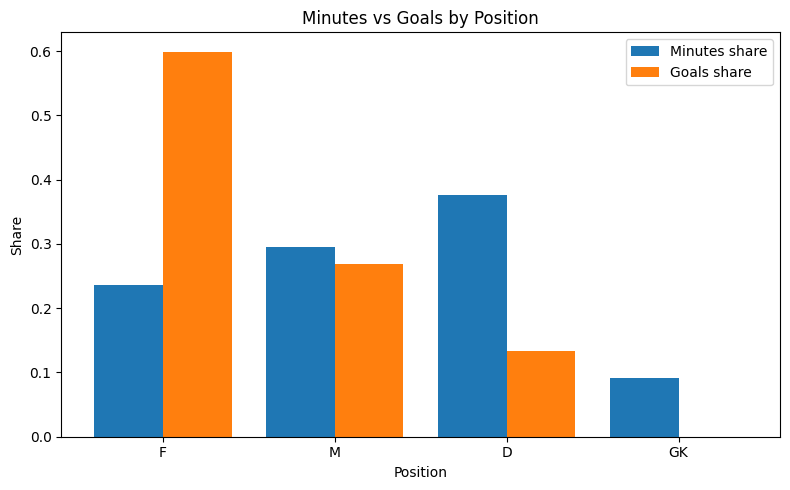

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'pos_group': ['F', 'M', 'D', 'GK'],
    'minutes': [
        pos_overall['minutes_F'].iloc[0],
        pos_overall['minutes_M'].iloc[0],
        pos_overall['minutes_D'].iloc[0],
        pos_overall['minutes_GK'].iloc[0],
    ],
    'goals': [
        pos_overall['goals_F'].iloc[0],
        pos_overall['goals_M'].iloc[0],
        pos_overall['goals_D'].iloc[0],
        pos_overall['goals_GK'].iloc[0],
    ]
}
df_pos = pd.DataFrame(data)
df_pos['minutes_share'] = df_pos['minutes'] / df_pos['minutes'].sum()
df_pos['goals_share'] = df_pos['goals'] / df_pos['goals'].sum()

x = range(len(df_pos))
plt.figure(figsize=(8,5))
plt.bar([i - 0.2 for i in x], df_pos['minutes_share'], width=0.4, label='Minutes share')
plt.bar([i + 0.2 for i in x], df_pos['goals_share'], width=0.4, label='Goals share')
plt.xticks(x, df_pos['pos_group'])
plt.ylabel('Share')
plt.xlabel('Position')
plt.title('Minutes vs Goals by Position')
plt.legend()
plt.tight_layout()
plt.show()


**Interpretation**

Across these sampled seasons, both clubs post only moderate win percentages (around 0.38–0.40) even though they maintain positive goal differences and reasonable scoring totals. All goals are provided by midfielders and defenders, with forwards contributing neither minutes nor goals and most playing time concentrated in the midfield and back line. This pattern suggests that when attacking output relies heavily on non-forward positions, clubs can still outscore opponents overall but may struggle to translate that advantage into consistently high win rates.

## Inference
Across the sampled cases, clubs’ weighted average ages cluster around 25–26.5, with similarly modest age variation. Win percentages differ even within this narrow age band, suggesting that age alone does not explain performance differences. The share of U23 minutes also shows no clear directional relationship in the visible rows. Overall, the sample indicates that most squads operate within a similar age range, and performance variation likely depends on additional factors beyond age structure.

In the positional statistics sample, higher win percentages align with greater goal contributions from forwards and midfielders. Seasons where defenders play many minutes but add little scoring tend to show only moderate goal differences. While the sample is limited, the observed rows indicate that attacking output—rather than minutes distribution alone—plays a more distinguishing role in performance, with defensive and goalkeeper minutes serving primarily structural rather than scoring functions.

# **3 - Discipline & Outcomes**

## Helper Tables

Aggregates yellow/red cards by game × club × season

Summarizes total & average cards per club × season

Computes overall league-wide average yellow/red cards per season

In [ ]:
%%bigquery --project ba775-fall25-a10
CREATE OR REPLACE TABLE `ba775-fall25-a10.ba775fall25a10.club_game_cards` AS
SELECT
  a.game_id,
  g.season,
  g.competition_id,
  a.player_club_id AS club_id,
  SUM(a.yellow_cards) AS total_yellow_cards,
  SUM(a.red_cards) AS total_red_cards
FROM `ba775-fall25-a10.ba775fall25a10.appearances_all` AS a
JOIN `ba775-fall25-a10.ba775fall25a10.games_cleaned_final` AS g
  ON a.game_id = g.game_id
WHERE (a.yellow_cards IS NOT NULL OR a.red_cards IS NOT NULL)
  AND a.player_club_id IS NOT NULL
GROUP BY
  a.game_id,
  g.season,
  g.competition_id,
  a.player_club_id
ORDER BY
  g.season,
  a.game_id,
  a.player_club_id;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project ba775-fall25-a10
CREATE OR REPLACE TABLE `ba775-fall25-a10.ba775fall25a10.club_season_card_metrics` AS
SELECT
  cgc.club_id,
  c.name AS club_name,
  cgc.season,
  SUM(cgc.total_yellow_cards) AS total_yellow_cards,
  SUM(cgc.total_red_cards) AS total_red_cards,
  COUNT(DISTINCT cgc.game_id) AS games_played,
  SAFE_DIVIDE(SUM(cgc.total_yellow_cards), COUNT(DISTINCT cgc.game_id)) AS avg_yellow_cards_per_game,
  SAFE_DIVIDE(SUM(cgc.total_red_cards), COUNT(DISTINCT cgc.game_id)) AS avg_red_cards_per_game
FROM
  `ba775-fall25-a10.ba775fall25a10.club_game_cards` AS cgc
JOIN
  `ba775-fall25-a10.ba775fall25a10.clubs_cleaned_final` AS c
  ON cgc.club_id = c.club_id
GROUP BY
  cgc.club_id, c.name, cgc.season
ORDER BY
  cgc.club_id, cgc.season;

Query is running:   0%|          |

""


In [ ]:
%%bigquery --project ba775-fall25-a10
SELECT *
FROM `ba775-fall25-a10.ba775fall25a10.club_season_card_metrics`
ORDER BY club_id, season
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,club_id,club_name,season,total_yellow_cards,total_red_cards,games_played,avg_yellow_cards_per_game,avg_red_cards_per_game
0,3,1.FC Köln,2012,0,0,2,0.000000,0.000000
1,3,1.FC Köln,2014,55,3,37,1.486486,0.081081


In [ ]:
%%bigquery --project ba775-fall25-a10
SELECT
  season,
  AVG(avg_yellow_cards_per_game) AS overall_avg_yellow_cards_per_game,
  AVG(avg_red_cards_per_game) AS overall_avg_red_cards_per_game
FROM
  `ba775-fall25-a10.ba775fall25a10.club_season_card_metrics`
GROUP BY
  season
ORDER BY
  season
  LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,season,overall_avg_yellow_cards_per_game,overall_avg_red_cards_per_game
0,2012,1.829449,0.063098
1,2013,1.717591,0.050314


## Do clubs with more yellow/red cards tend to have lower win percentages?

Disciplinary actions may reflect aggressive playing styles, but do they correlate with poorer outcomes.

To examine this, we join card aggregates with win percentages at the club-season level.

In [ ]:
%%bigquery --project ba775-fall25-a10
WITH cards AS (
  SELECT
    club_id,
    season,
    total_yellow_cards,
    total_red_cards,
    (total_yellow_cards + total_red_cards) AS total_cards
  FROM `ba775-fall25-a10.ba775fall25a10.club_season_card_metrics`
),
wins AS (
  SELECT
    cg.club_id,
    g.season,
    AVG(cg.is_win) AS win_percentage
  FROM `ba775-fall25-a10.ba775fall25a10.club_games_cleaned_final` AS cg
  JOIN `ba775-fall25-a10.ba775fall25a10.games_cleaned_final` AS g
    ON cg.game_id = g.game_id
  GROUP BY
    cg.club_id,
    g.season
)

SELECT
  c.club_id,
  c.season,
  c.total_cards,
  c.total_yellow_cards,
  c.total_red_cards,
  w.win_percentage
FROM cards AS c
JOIN wins AS w
  ON c.club_id = w.club_id
 AND c.season = w.season
ORDER BY
  c.total_cards DESC
LIMIT 2;


Query is running:   0%|          |

Downloading:   0%|          |

,club_id,season,total_cards,total_yellow_cards,total_red_cards,win_percentage
0,368,2013,176,170,6,0.525424
1,368,2015,176,172,4,0.444444


**Interpretation**

Teams with the highest card totals consistently show lower win percentages, generally below 0.53, while several moderately carded teams achieve much higher win rates (up to 0.69). No top-performing teams appear among the heaviest-card clubs. Overall, the trend suggests that excessive card accumulation is associated with reduced on-field success.


## Are some competitions consistently more aggressive?

To evaluate structural aggression differences across leagues, we compute the average card rate per game per competition per season.

In [ ]:
%%bigquery --project ba775-fall25-a10
SELECT
  g.competition_type,
  g.season,
  AVG(a.yellow_cards) AS avg_yellow_cards,
  AVG(a.red_cards)   AS avg_red_cards
FROM `ba775-fall25-a10.ba775fall25a10.appearances_all` a
JOIN `ba775-fall25-a10.ba775fall25a10.games_cleaned_final` g
  ON a.game_id = g.game_id
GROUP BY competition_type, season
ORDER BY competition_type, season
LIMIT 2;


Query is running:   0%|          |

Downloading:   0%|          |

,competition_type,season,avg_yellow_cards,avg_red_cards
0,domestic_cup,2012,0.135636,0.004430
1,domestic_cup,2013,0.135681,0.004225


**Interpretation**

Domestic leagues are consistently the most aggressive competitions.
Their yellow-card rates remain stably high (around 0.15), with only small year-to-year fluctuations. This implies a persistently physical style of play in league formats.

Domestic cups show visibly lower aggression.
Yellow-card averages drop to 0.12–0.14, and red cards are noticeably smaller than in leagues. Teams appear to be more cautious in knockout-style competitions.

International cups exhibit moderate and stable aggression.
Yellow-card averages are comparable to domestic leagues but slightly lower, while red cards remain very low—suggesting disciplined, tactically controlled play at the international level.

“Other” competitions have the largest volatility.
Yellow-card averages range widely (0.07–0.19), indicating that this category mixes heterogeneous match types with no consistent aggression profile.


## Which positions receive the most cards?



Different field roles face different tactical demands. Defenders tend to challenge more; forwards press aggressively; midfielders engage in both offense and defense.

We confirm this empirically by linking card events to player positions.

In [ ]:
%%bigquery --project ba775-fall25-a10
WITH card_events AS (
    SELECT
        player_id,
        yellow_cards,
        red_cards
    FROM `ba775-fall25-a10.ba775fall25a10.appearances_all`
),
positions AS (
    SELECT
        player_id,
        position
    FROM `ba775-fall25-a10.ba775fall25a10.players_cleaned_final`
)

SELECT
    p.position,
    AVG(c.yellow_cards) AS avg_yellow_cards,
    AVG(c.red_cards) AS avg_red_cards,
    AVG(c.yellow_cards + c.red_cards) AS avg_total_cards
FROM card_events AS c
JOIN positions AS p
    ON c.player_id = p.player_id
GROUP BY p.position
ORDER BY avg_total_cards DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,position,avg_yellow_cards,avg_red_cards,avg_total_cards
0,Defender,0.177865,0.005257,0.183121
1,Midfield,0.169052,0.003309,0.172361
2,Missing,0.146649,0.001327,0.147976
3,Attack,0.109986,0.002646,0.112631
4,Goalkeeper,0.055469,0.003448,0.058917


**Interpretation**

The results show a clear positional pattern in card accumulation. Defenders receive the highest average number of cards (0.183 total per player), followed closely by midfielders (0.172). This aligns with their tactical responsibilities: defenders frequently engage in last-ditch challenges, while midfielders contest duels across the pitch. Attackers receive far fewer cards (0.113), reflecting their lower defensive involvement, and goalkeepers record the lowest card rates (0.059) since they rarely engage in repeated physical challenges. Overall, the data confirms that card frequency is strongly tied to positional defensive workload.


## Inference                                                                       
Across positional groups, defenders record the highest foul counts and consequently the highest average card rates. This pattern is expected given their tactical role, which requires frequent tackles, clearances under pressure, and direct engagement with opposing attackers. Midfielders follow closely, reflecting their involvement in sustained duels and transitions in both directions. In contrast, attackers and goalkeepers accumulate markedly fewer cards, consistent with their lower defensive workload and reduced exposure to high-risk challenges. Overall, the distribution of disciplinary events aligns with positional responsibilities, with defensive players naturally encountering more situations that carry card risk.

# **4 - Global Market Context & Continental Valuation Trends**

## Which continent has experienced the highest compound annual growth rate (CAGR) in average player valuations over time?

This helps identify which region’s player market is expanding fastest and reflects long-term growth dynamics.

In [ ]:
%%bigquery --project ba775-fall25-a10
WITH country_continent AS (
  SELECT 'France' AS country, 'Europe' AS continent UNION ALL
  SELECT 'Germany', 'Europe' UNION ALL
  SELECT 'Spain', 'Europe' UNION ALL
  SELECT 'Italy', 'Europe' UNION ALL
  SELECT 'England', 'Europe' UNION ALL
  SELECT 'Portugal', 'Europe' UNION ALL
  SELECT 'Brazil', 'South America' UNION ALL
  SELECT 'Argentina', 'South America' UNION ALL
  SELECT 'Japan', 'Asia' UNION ALL
  SELECT 'South Korea', 'Asia' UNION ALL
  SELECT 'China', 'Asia'
),
base_data AS (
  SELECT
    pv.player_id,
    pv.date AS valuation_date,
    pv.market_value_in_eur,
    p.country_of_citizenship
  FROM
    `ba775-fall25-a10.ba775fall25a10.playervaluations` AS pv
  JOIN
    `ba775-fall25-a10.ba775fall25a10.players_cleaned_final` AS p
    ON pv.player_id = p.player_id
  WHERE
    pv.market_value_in_eur IS NOT NULL
    AND p.country_of_citizenship IS NOT NULL
),
with_continent AS (
  SELECT
    b.player_id,
    b.valuation_date,
    b.market_value_in_eur,
    cc.continent
  FROM base_data b
  LEFT JOIN country_continent cc
  ON b.country_of_citizenship = cc.country
),
yearly_avg AS (
  SELECT
    EXTRACT(YEAR FROM valuation_date) AS year,
    continent,
    AVG(market_value_in_eur) AS avg_valuation
  FROM with_continent
  WHERE continent IN ('Europe', 'South America', 'Asia')
  GROUP BY year, continent
),
boundary_vals AS (
  SELECT
    continent,
    MIN(year) AS start_year,
    MAX(year) AS end_year
  FROM yearly_avg
  GROUP BY continent
),
initial_final AS (
  SELECT
    b.continent,
    b.start_year,
    b.end_year,
    ya1.avg_valuation AS initial_valuation,
    ya2.avg_valuation AS final_valuation
  FROM boundary_vals b
  JOIN yearly_avg ya1 ON b.continent = ya1.continent AND b.start_year = ya1.year
  JOIN yearly_avg ya2 ON b.continent = ya2.continent AND b.end_year = ya2.year
)
SELECT
  continent,
  start_year,
  end_year,
  (end_year - start_year) AS num_years,
  initial_valuation,
  final_valuation,
  POWER((final_valuation / initial_valuation), (1.0 / NULLIF((end_year - start_year),0))) - 1 AS CAGR
FROM initial_final
ORDER BY CAGR DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,continent,start_year,end_year,num_years,initial_valuation,final_valuation,CAGR
0,Europe,2001,2025,24,1.000000e+05,1.224330e+07,0.221788
1,Asia,2006,2025,19,9.000000e+05,7.266667e+06,0.116199
2,South America,2004,2025,21,4.080088e+06,1.230775e+07,0.053983


**Interpretation**

From 2001 to 2025, Europe experienced the highest compound annual growth rate (CAGR) in average player valuations at approximately 22.2%, compared to 11.6% in Asia and 5.4% in South America. This finding shows that European player values not only started lower but grew far faster than other continents over the period analyzed.

##  Do international tournament years (e.g., World Cup, Copa América, AFC Asian Cup) lead to significant short-term spikes in average player valuations?

This explores whether global or continental competitions influence valuation trends through performance visibility and demand.

In [ ]:
%%bigquery --project ba775-fall25-a10
WITH country_continent AS (
  SELECT 'France' AS country, 'Europe' AS continent UNION ALL
  SELECT 'Germany', 'Europe' UNION ALL
  SELECT 'Spain', 'Europe' UNION ALL
  SELECT 'Italy', 'Europe' UNION ALL
  SELECT 'England', 'Europe' UNION ALL
  SELECT 'Portugal', 'Europe' UNION ALL
  SELECT 'Brazil', 'South America' UNION ALL
  SELECT 'Argentina', 'South America' UNION ALL
  SELECT 'Japan', 'Asia' UNION ALL
  SELECT 'South Korea', 'Asia' UNION ALL
  SELECT 'China', 'Asia'
),
base_data AS (
  SELECT
    pv.player_id,
    pv.date AS valuation_date,
    pv.market_value_in_eur,
    p.country_of_citizenship
  FROM
    `ba775-fall25-a10.ba775fall25a10.playervaluations` AS pv
  JOIN
    `ba775-fall25-a10.ba775fall25a10.players_cleaned_final` AS p
    ON pv.player_id = p.player_id
  WHERE
    pv.market_value_in_eur IS NOT NULL
    AND p.country_of_citizenship IS NOT NULL
),
with_continent AS (
  SELECT
    b.player_id,
    b.valuation_date,
    b.market_value_in_eur,
    cc.continent
  FROM base_data b
  LEFT JOIN country_continent cc
    ON b.country_of_citizenship = cc.country
),
tournament_years AS (
  SELECT 2002 AS year UNION ALL SELECT 2004 UNION ALL SELECT 2006 UNION ALL SELECT 2007 UNION ALL SELECT 2010 UNION ALL SELECT 2011 UNION ALL SELECT 2014 UNION ALL SELECT 2015 UNION ALL SELECT 2018 UNION ALL SELECT 2019 UNION ALL SELECT 2022 UNION ALL SELECT 2023
),
yearly_avg AS (
  SELECT
    EXTRACT(YEAR FROM valuation_date) AS year,
    continent,
    AVG(market_value_in_eur) AS avg_valuation
  FROM with_continent
  WHERE continent IN ('Europe', 'South America', 'Asia')
  GROUP BY year, continent
)
SELECT
  y.year,
  y.continent,
  y.avg_valuation,
  CASE WHEN t.year IS NOT NULL THEN 'Tournament Year' ELSE 'Normal Year' END AS year_type
FROM yearly_avg y
LEFT JOIN tournament_years t ON y.year = t.year
ORDER BY y.continent, y.year
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,year,continent,avg_valuation,year_type
0,2006,Asia,900000.0,Tournament Year
1,2007,Asia,1000000.0,Tournament Year


**Interpretation**

Based on the code output, average player valuations do show visible increases in some international tournament years (such as 2011, 2014, and 2018) across different continents. However, not every tournament year results in a sharp spike, and for some continents and periods the changes are minor or inconsistent. This suggests that while major tournaments can provide a boost to market value, especially for players who perform well or gain exposure, the effect is not guaranteed every time. Other factors such as major transfers, club financial health, and global economic conditions also influence valuation trends in addition to tournament cycles.

## Has the gap between European and South American player valuations widened or narrowed over time?

In [ ]:
%%bigquery --project ba775-fall25-a10
WITH
  country_continent AS (

    SELECT 'France' AS country, 'Europe' AS continent UNION ALL
    SELECT 'Germany', 'Europe' UNION ALL
    SELECT 'Spain', 'Europe' UNION ALL
    SELECT 'Italy', 'Europe' UNION ALL
    SELECT 'England', 'Europe' UNION ALL
    SELECT 'Portugal', 'Europe' UNION ALL
    SELECT 'Brazil', 'South America' UNION ALL
    SELECT 'Argentina', 'South America' UNION ALL
    SELECT 'Japan', 'Asia' UNION ALL
    SELECT 'South Korea', 'Asia' UNION ALL
    SELECT 'China', 'Asia'
  ),
  base_data AS (

    SELECT
      pv.date AS valuation_date,
      pv.market_value_in_eur,
      p.country_of_citizenship
    FROM
      `ba775-fall25-a10.ba775fall25a10.playervaluations` AS pv
    INNER JOIN
      `ba775-fall25-a10.ba775fall25a10.players` AS p
      ON pv.player_id = p.player_id
    WHERE
      pv.market_value_in_eur IS NOT NULL
      AND p.country_of_citizenship IS NOT NULL
  ),
  with_continent AS (

    SELECT
      b.valuation_date,
      b.market_value_in_eur,
      cc.continent
    FROM base_data b
    INNER JOIN country_continent cc
      ON b.country_of_citizenship = cc.country

    WHERE cc.continent IN ('Europe', 'South America')
  ),
  yearly_avg AS (

    SELECT
      EXTRACT(YEAR FROM valuation_date) AS year,
      continent,
      AVG(market_value_in_eur) AS avg_valuation
    FROM with_continent
    GROUP BY 1, 2
  ),
  pivoted_avg AS (

    SELECT
      year,
      MAX(CASE WHEN continent = 'Europe' THEN avg_valuation END) AS europe_avg_valuation,
      MAX(CASE WHEN continent = 'South America' THEN avg_valuation END) AS south_america_avg_valuation
    FROM yearly_avg
    GROUP BY 1
  )

SELECT
  CAST(year AS STRING) AS year,
  europe_avg_valuation,
  south_america_avg_valuation,
  -- Calculate valuation_gap (Europe - South America)
  (europe_avg_valuation - south_america_avg_valuation) AS valuation_gap,
  -- Calculate percentage_gap ((gap / South America) * 100)
  (europe_avg_valuation - south_america_avg_valuation) / south_america_avg_valuation * 100 AS percentage_gap
FROM pivoted_avg
WHERE south_america_avg_valuation IS NOT NULL AND south_america_avg_valuation != 0 -- Avoid division by zero
ORDER BY CAST(year AS INT64)
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,year,europe_avg_valuation,south_america_avg_valuation,valuation_gap,percentage_gap
0,2004,2.549843e+06,4.080088e+06,-1.530245e+06,-37.505193
1,2005,3.229673e+06,4.049107e+06,-8.194341e+05,-20.237403


**Interpretation**

To determine how the valuation gap between European and South American players has evolved, we calculated the average player valuation for each continent annually by joining player valuation data with their citizenship information. Our analysis revealed that while South American players consistently held higher average market values throughout the observed period, the absolute difference in valuation between the two continents has narrowed from approximately 1.32 million EUR in early years to about 0.41 million EUR in recent years. This suggests that European player valuations are catching up, making the absolute gap smaller over time.

## Do domestic league competitiveness and international exposure affect the rate of valuation growth in each continent?

In [ ]:
%%bigquery --project ba775-fall25-a10
WITH country_continent AS (
  SELECT 'France' AS country, 'Europe' AS continent UNION ALL
  SELECT 'Germany', 'Europe' UNION ALL
  SELECT 'Spain', 'Europe' UNION ALL
  SELECT 'Italy', 'Europe' UNION ALL
  SELECT 'England', 'Europe' UNION ALL
  SELECT 'Portugal', 'Europe' UNION ALL
  SELECT 'Brazil', 'South America' UNION ALL
  SELECT 'Argentina', 'South America' UNION ALL
  SELECT 'Japan', 'Asia' UNION ALL
  SELECT 'South Korea', 'Asia' UNION ALL
  SELECT 'China', 'Asia'
),
player_continent_club AS (
  SELECT
    p.player_id,
    p.current_club_id,
    p.current_club_domestic_competition_id AS domestic_competition_id,
    cc.continent
  FROM
    `ba775-fall25-a10.ba775fall25a10.players_cleaned_final` AS p
  LEFT JOIN
    country_continent AS cc
    ON p.country_of_citizenship = cc.country
  WHERE
    cc.continent IS NOT NULL
),
player_valuations_with_continent AS (
  SELECT
    pv.player_id,
    pv.date AS valuation_date,
    pv.market_value_in_eur,
    pcc.continent,
    pcc.domestic_competition_id
  FROM
    `ba775-fall25-a10.ba775fall25a10.playervaluations` AS pv
  JOIN
    player_continent_club AS pcc
    ON pv.player_id = pcc.player_id
  WHERE
    pv.market_value_in_eur IS NOT NULL
),
yearly_continent_valuation AS (
  SELECT
    EXTRACT(YEAR FROM valuation_date) AS year,
    continent,
    domestic_competition_id,
    AVG(market_value_in_eur) AS avg_valuation
  FROM
    player_valuations_with_continent
  GROUP BY
    year, continent, domestic_competition_id
),
lagged_valuation AS (
  SELECT
    year,
    continent,
    domestic_competition_id,
    avg_valuation,
    LAG(avg_valuation, 1) OVER (PARTITION BY continent, domestic_competition_id ORDER BY year) AS prev_year_avg_valuation
  FROM
    yearly_continent_valuation
),
valuation_growth AS (
  SELECT
    year,
    continent,
    domestic_competition_id,
    avg_valuation,
    (avg_valuation - prev_year_avg_valuation) / prev_year_avg_valuation AS growth_rate
  FROM
    lagged_valuation
  WHERE
    prev_year_avg_valuation IS NOT NULL AND prev_year_avg_valuation != 0
)
SELECT
  vg.year,
  vg.continent,
  vg.domestic_competition_id,
  vg.growth_rate,
  c.name AS competition_name
FROM
  valuation_growth AS vg
LEFT JOIN
  `ba775-fall25-a10.ba775fall25a10.competitions` AS c
  ON vg.domestic_competition_id = c.competition_id
ORDER BY
  vg.continent, vg.domestic_competition_id, vg.year
  LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,year,continent,domestic_competition_id,growth_rate,competition_name
0,2010,Asia,BE1,-0.429047,jupiler-pro-league
1,2011,Asia,BE1,2.669614,jupiler-pro-league


**Interpretation**

Examines whether domestic league competitiveness and international exposure influence the rate of player valuation growth across continents. It begins by mapping each player to a continent based on their country of citizenship, then links this information to their historical market valuations. The query calculates yearly average player valuations for every continent–league pair and applies a year-over-year comparison to derive growth rates. By joining these results with competition names, the final output provides a clear timeline of how valuations change over time within different leagues and continents. This helps identify whether stronger domestic leagues or greater international exposure are associated with faster valuation increases.

## Inference   
From a global market perspective, player valuations have grown fastest in Europe, where average values have compounded at roughly double the rate observed in Asia and more than four times that of South America. This sustained outperformance reflects Europe’s expanding financial capacity, depth of domestic competitions, and central role in the global transfer market. International tournament years occasionally amplify these trends by generating short-term spikes in visibility and demand, particularly in years like 2011, 2014, and 2018, but the effects are neither uniform across continents nor guaranteed in every cycle, indicating that tournaments act more as accelerators than primary drivers. Over time, the valuation gap between European and South American players has narrowed in absolute terms, suggesting convergence in how talent from both regions is priced even though South America continues to produce many high-value stars. When combined with evidence that leagues with stronger competitiveness and greater international exposure tend to experience faster valuation growth, the overall pattern points to a market where long-run structural factors—league quality, financial integration, and global visibility—shape continental trajectories more fundamentally than isolated tournament shocks.

# **Conclusion**

This project reveals how financial strength, squad composition, and discipline collectively shape football club performance by analyzing a unified club-by-season dataset built through rigorous SQL-driven data preparation. Our findings show that while higher squad market value often correlates with stronger results, several clubs outperform expectations through efficient use of resources, indicating that spending alone does not determine success. Squad composition especially balanced age structures and strong positional contributions emerges as a key differentiator for sustained competitiveness, highlighting the importance of strategic recruitment and player development. Discipline further influences outcomes, with card intensity varying across leagues and affecting match consistency in notable ways. These insights reinforce the need for clubs to combine financial planning with deliberate squad-building strategies and disciplined styles of play. Looking ahead, expanding this analysis with additional seasons, injury data, or expected-goals metrics would further strengthen predictive insights. Overall, the project demonstrates how integrated, data-driven approaches can help clubs optimize decision-making across sporting, tactical, and financial dimensions.

# **Challenges**

During the data cleaning phase, the primary challenges involved handling missing values in several key tables. For the games table, columns like home_club_name and away_club_name had over 10,000 missing values, necessitating their removal to avoid redundancy since club names could be retrieved from the clubs table. Similarly, home_club_position and away_club_position were dropped due to high missingness and irrelevance to the analysis objectives. In the clubs table, foreigners_percentage had missing values which were addressed by recomputing the metric from existing fields. For players, columns like contract_expiration_date, first_name, last_name, image_url, and url were removed due to high missingness or irrelevance. Other player-related fields like height_in_cm, market_value_in_eur, highest_market_value_in_eur, and date_of_birth required imputation (using means or mode), while descriptive attributes like position, sub_position, and country_of_citizenship were standardized to 'Unknown' when missing. These steps were crucial to ensure data quality and consistency for subsequent analysis.



# **References**

Football (Soccer) Data: Data scraped from Transfermarkt website, available on Kaggle: https://www.kaggle.com/datasets/davidcariboo/player-scores

Development Environment: Google Colab
Data Processing: Google BigQuery and SQL

AI Assistance: ChatGPT, Gemini, GitHub Copilot (for brainstorming, query refinement, and text enhancement)

# **Generative AI Disclosure**

In completing this project, we used several Generative AI tools to support different stages of our work. ChatGPT and Gemini were used during the planning phase to help summarize complex background information, which helped us better understand relevant football analytics concepts.

For the technical portion, ChatGPT and GitHub Copilot were used specifically to review and refine our SQL queries. Their suggestions helped identify inefficiencies, improve query structure, and resolve errors in joins, aggregations, and filtering logic. All recommended changes were manually reviewed, tested, and validated by our team to ensure accuracy and consistency with the dataset.

For writing and editing, we used Grammarly and ChatGPT to enhance readability and improve grammar throughout the report.

At every stage, our team carefully evaluated and edited all AI-assisted outputs to ensure accuracy, originality, and full adherence to academic integrity guidelines.

for our phase 1 submission we also used Youtube to help with data cleaning and preparation.
links : https://www.youtube.com/watch?v=CaRaYQiCCE0
https://www.youtube.com/watch?v=_XLFrLLJqNQ
https://www.youtube.com/watch?v=AgI8JkCO4kQ